In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# Working with Time Series

* Time stamps reference particular moments in time (e.g., July 4th, 2015, at 7:00 a.m.).
* Time intervals and periods reference a length of time between a particular beginning and end point—for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods constituting days).
* Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).


## Dates and Times in Python

In [2]:
from datetime import datetime

date = datetime(20,12,5)

date, date.strftime("%A")

(datetime.datetime(20, 12, 5, 0, 0), 'Saturday')

In [3]:
from dateutil import parser

date = parser.parse("2020 Dec 5th")

date, date.strftime("%A")

(datetime.datetime(2020, 12, 5, 0, 0), 'Saturday')

In the final line, we’ve used one of the standard string format codes for printing dates
( "%A" ), which you can read about in the strftime section of Python’s datetime docu‐
mentation. Documentation of other useful date utilities can be found in dateutil’s
online documentation. A related package to be aware of is pytz , which contains tools
for working with the most migraine-inducing piece of time series data: time zones.

## Typed arrays of times: NumPy’s datetime64

In [4]:
date = np.array("2020-12-04", dtype=np.datetime64)

date 

array('2020-12-04', dtype='datetime64[D]')

In [5]:
date + np.arange(10)

array(['2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07',
       '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
       '2020-12-12', '2020-12-13'], dtype='datetime64[D]')

Because of the uniform type in NumPy datetime64 arrays, this type of operation can
be accomplished much more quickly than if we were working directly with Python’s
datetime objects, especially as arrays get large

One detail of the datetime64 and timedelta64 objects is that they are built on a fun‐
damental time unit. Because the datetime64 object is limited to 64-bit precision, the
range of encodable times is 2 64 times this fundamental unit. In other words, date
time64 imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough
information to encode a range of 2 64 nanoseconds, or just under 600 years. NumPy
will infer the desired unit from the input; for example, here is a day-based datetime:

In [6]:
np.datetime64("2020-12-05")

numpy.datetime64('2020-12-05')

Notice that the time zone is automatically set to the local time on the computer exe‐
cuting the code. You can force any desired fundamental unit using one of many for‐
mat codes; for example, here we’ll force a nanosecond-based time:

In [7]:
np.datetime64("2020-12-05 10:59:59.50","ns")

numpy.datetime64('2020-12-05T10:59:59.500000000')

For the types of data we see in the real world, a useful default is datetime64[ns] , as it
can encode a useful range of modern dates with a suitably fine precision

Finally, we will note that while the datetime64 data type addresses some of the defi‐
ciencies of the built-in Python datetime type, it lacks many of the convenient meth‐
ods and functions provided by datetime and especially dateutil

In [8]:
np.array("20121207", dtype=np.datetime64)

array('20121207', dtype='datetime64[Y]')

## Dates and times in Pandas: Best of both worlds

In [15]:
date = pd.to_datetime(["2012-12-05", 
                       datetime(2012,12,6),                        
                       parser.parse("2012-12-08")])

date

DatetimeIndex(['2012-12-05', '2012-12-06', '2012-12-08'], dtype='datetime64[ns]', freq=None)

Additionally, we can do NumPy-style vectorized operations directly on this same
object:

In [23]:
# Create an array series times in next 10 days
date = pd.to_datetime(datetime.now())

date + pd.to_timedelta(np.arange(10),"D")

DatetimeIndex(['2020-12-06 08:08:50.749993', '2020-12-07 08:08:50.749993',
               '2020-12-08 08:08:50.749993', '2020-12-09 08:08:50.749993',
               '2020-12-10 08:08:50.749993', '2020-12-11 08:08:50.749993',
               '2020-12-12 08:08:50.749993', '2020-12-13 08:08:50.749993',
               '2020-12-14 08:08:50.749993', '2020-12-15 08:08:50.749993'],
              dtype='datetime64[ns]', freq=None)

# Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to index
data by timestamps. For example, we can construct a Series object that has time-
indexed data:

In [39]:
index = pd.DatetimeIndex(["2020-12-06", "2020-12-07", "2020-12-08", "2020-12-09", "2020-12-10"])
data = pd.Series(np.random.randn(5),index=index)
data

2020-12-06   -1.344021
2020-12-07    0.588456
2020-12-08   -0.836270
2020-12-09    0.358308
2020-12-10   -0.210557
dtype: float64

Now that we have this data in a Series , we can make use of any of the Series index‐
ing patterns we discussed in previous sections, passing values that can be coerced into
dates:

In [41]:
data["2020-12-06" : "2020-12-08"]

2020-12-06   -1.344021
2020-12-07    0.588456
2020-12-08   -0.836270
dtype: float64

There are additional special date-only indexing operations, such as passing a year to
obtain a slice of all data from that year:

In [43]:
data["2020-12-07"]

0.5884556496396588

## Pandas Time Series Data Structures

* For time stamps, Pandas provides the Timestamp type. As mentioned before, it is
essentially a replacement for Python’s native datetime , but is based on the more
efficient numpy.datetime64 data type. The associated index structure is
DatetimeIndex .
* For time periods, Pandas provides the Period type. This encodes a fixed-
frequency interval based on numpy.datetime64 . The associated index structure is
PeriodIndex .
* For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a
more efficient replacement for Python’s native datetime.timedelta type, and is
based on numpy.timedelta64 . The associated index structure is TimedeltaIndex .

In [51]:
dates = pd.to_datetime([datetime(2020,12,6), "2020 Dec 7th", "2020-12-08", "12-09-2020", "10th of Dec, 2020"])

dates

DatetimeIndex(['2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() func‐
tion with the addition of a frequency code; here we’ll use 'D' to indicate daily
frequency:

In [52]:
dates.to_period(freq="D")

PeriodIndex(['2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
             '2020-12-10'],
            dtype='period[D]', freq='D')

A TimedeltaIndex is created, for example, when one date is subtracted from another:`

In [53]:
dates- dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: pd.date_range()
To make the creation of regular date sequences more convenient, Pandas offers a few
functions for this purpose: pd.date_range() for timestamps, pd.period_range() for
periods, and pd.timedelta_range() for time deltas. We’ve seen that Python’s range() and NumPy’s np.arange() turn a startpoint, endpoint, and optional stepsize
into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an
optional frequency code to create a regular sequence of dates. By default, the fre‐
quency is one day:

In [61]:
dates = pd.date_range(datetime.now(),periods=10,freq="D")
dates.to_period(freq="d")

PeriodIndex(['2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
             '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
             '2020-12-14', '2020-12-15'],
            dtype='period[D]', freq='D')

In [70]:
pd.date_range(datetime.now(), periods=10, freq="M")

DatetimeIndex(['2020-12-31 08:37:41.759177', '2021-01-31 08:37:41.759177',
               '2021-02-28 08:37:41.759177', '2021-03-31 08:37:41.759177',
               '2021-04-30 08:37:41.759177', '2021-05-31 08:37:41.759177',
               '2021-06-30 08:37:41.759177', '2021-07-31 08:37:41.759177',
               '2021-08-31 08:37:41.759177', '2021-09-30 08:37:41.759177'],
              dtype='datetime64[ns]', freq='M')

In [81]:
pd.timedelta_range(0, periods=10,freq="D")

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days', '7 days', '8 days', '9 days'],
               dtype='timedelta64[ns]', freq='D')

## Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is
an important piece of the Pandas time series tools. The benefits of indexed data in
general (automatic alignment during operations, intuitive data slicing and access,
etc.) still apply, and Pandas provides several additional time series–specific
operations.

We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very spe‐
cific tools for financial data. For example, the accompanying pandas-datareader
package (installable via conda install pandas-datareader ) knows how to import financial data from a number of available sources, including Yahoo finance, Google
Finance, and others. Here we will load Google’s closing price history:

### Example Google Stock Price

In [142]:
google = pd.read_csv("../../data/google-stock/Google_Stock_Price_Train.csv", parse_dates=True, index_col="Date", delimiter=",")

In [143]:
google.dtypes

Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [144]:
google

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [164]:
google["Close"] = google["Close"].replace(regex=",",value="").astype(np.float64)

In [170]:
google["Close"].dtypes

dtype('float64')

Text(0.5, 0.98, 'Google Stock price from 2012-01-03 to 2016-12-30')

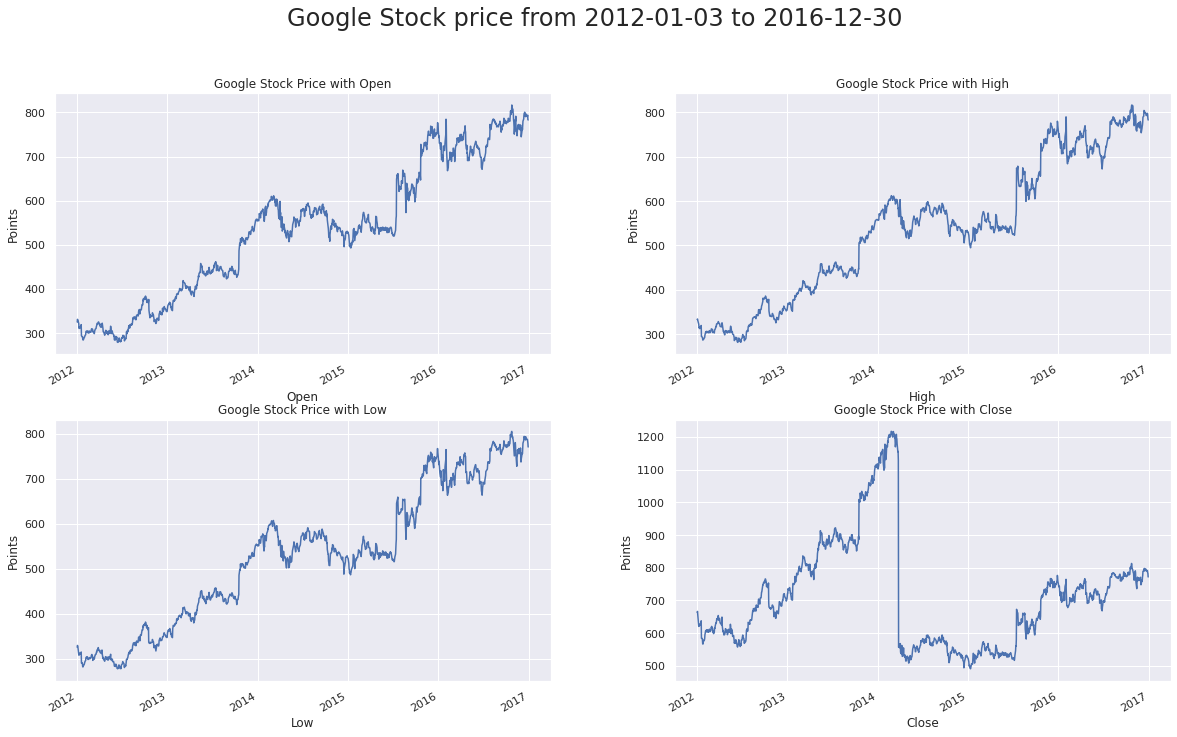

In [216]:
%matplotlib inline 
fig, ax = plt.subplots(2,2,figsize=(20,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)
i,j = 0 ,0
for col, values in google.items() : 
    if pd.api.types.is_float_dtype(values) : 
        google[col].plot(ax=ax[i,j])     
        ax[i,j].set(xlabel=f"{col}", ylabel="Points",title=f"Google Stock Price with {col}")   
        
        if j == 1 and i < len(ax) :
            i +=1 
            j = 0 
        else :j+=1 
fig.suptitle("Google Stock price from 2012-01-03 to 2016-12-30", fontsize=24)  


### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency.
You can do this using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally
a data aggregation, while asfreq() is fundamentally a data selection.


Taking a look at the Google closing price, let’s compare what the two return when we down-sample the data. Here we will resample the data at the end of business year

In [233]:
business_year_end = google["Close"].resample("BA").mean()
business_year_end

Date
2012-12-31    641.056960
2013-12-31    881.821746
2014-12-31    694.409008
2015-12-31    602.005556
2016-12-30    743.486706
2017-12-29           NaN
Freq: BA-DEC, Name: Close, dtype: float64

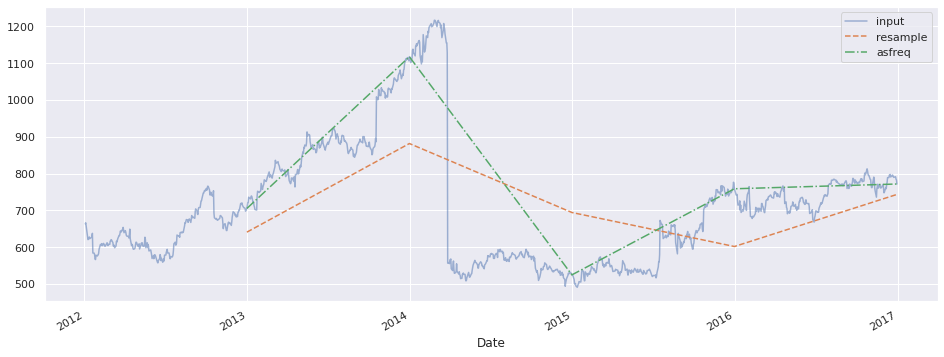

In [236]:
fig, ax = plt.subplots(figsize=(16,6))
google["Close"].plot(alpha=0.5,style="-", ax=ax, label="input")
business_year_end.plot(style="--",ax=ax, label="resample")
google["Close"].asfreq("BA").plot(style="-.",ax=ax, label="asfreq")
plt.legend()

Notice the difference: at each point, resample reports the average of the previous year,
while asfreq reports the value at the end of the year.

For up-sampling, resample() and asfreq() are largely equivalent, though resample
has many more options available. In this case, the default for both methods is to leave
the up-sampled points empty—that is, filled with NA values. Just as with the
pd.fillna() function discussed previously, asfreq() accepts a method argument to
specify how values are imputed. Here, we will resample the business day data at a
daily frequency (i.e., including weekends)

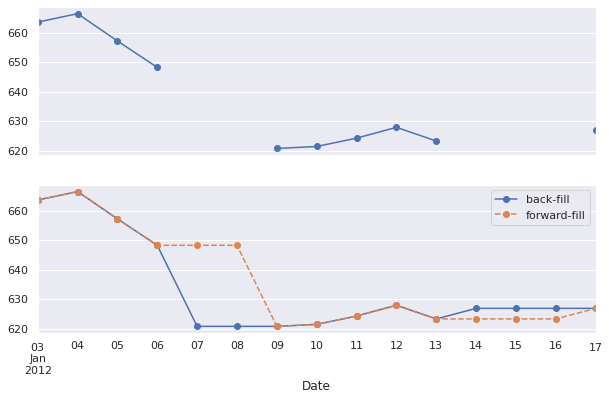

In [242]:
fig, ax = plt.subplots(2, figsize=(10,6) ,sharex=True)
data = google["Close"].iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time-shifts

Another common time series–specific operation is shifting of data in time. Pandas
has two closely related methods for computing this: shift() and tshift() . In short,
the difference between them is that shift() shifts the data, while tshift() shifts the
index. In both cases, the shift is specified in multiples of the frequency.

Here we will both shift() and tshift() by 900 days

<ipython-input-278-2216c97d24e9>:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


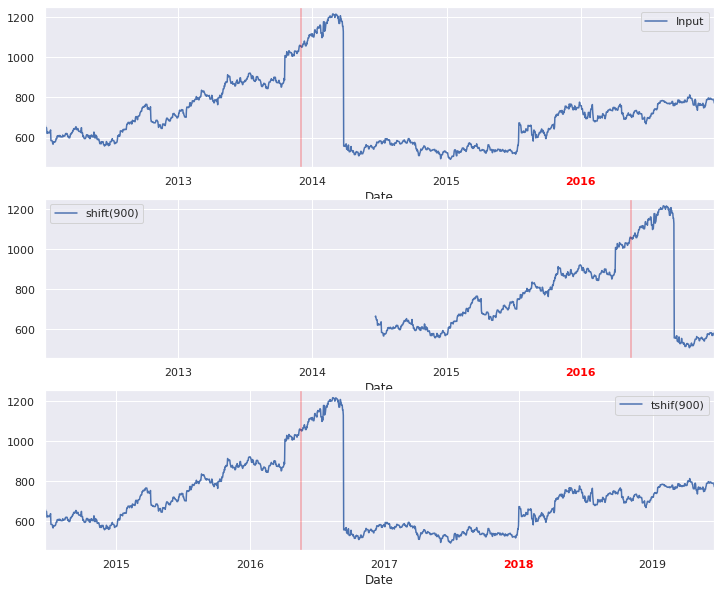

In [278]:
fig, ax = plt.subplots(3, figsize=(12,10), sharey=True)

goog = google["Close"].asfreq("D", method="ffill")

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime("2013-11-30")
offset = pd.Timedelta(900,"D")

ax[0].legend(["Input"])
ax[0].get_xticklabels()[4].set(weight="heavy", color="red")
ax[0].axvline(local_max, color="red", alpha=0.3)

ax[1].legend(["shift(900)"])
ax[1].get_xticklabels()[4].set(weight="heavy", color="red")
ax[1].axvline(local_max+offset, color="red", alpha=0.3)

ax[2].legend(["tshif(900)"])
ax[2].get_xticklabels()[4].set(weight="heavy", color="red")
ax[2].axvline(local_max+offset, color="red", alpha=0.3)

We see here that shift(900) shifts the data by 900 days, pushing some of it off the
end of the graph (and leaving NA values at the other end), while tshift(900) shifts
the index values by 900 days.

A common context for this type of shift is computing differences over time. For
example, we use shifted values to compute the one-year return on investment for
Google stock over the course of the dataset (Figure 3-9):

<ipython-input-281-2718124529dc>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365)/goog - 1)


<AxesSubplot:xlabel='Date'>

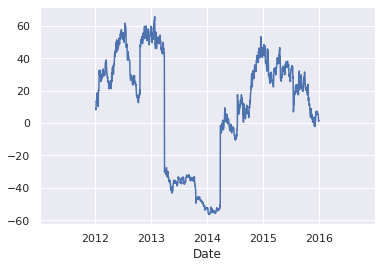

In [281]:
ROI = 100 * (goog.tshift(-365)/goog - 1)
ROI.plot()

This helps us to see the overall trend in Google stock: thus far, the most profitable
times to invest in Google have been (unsurprisingly, in retrospect) shortly after its
IPO, and in the middle of the 2009 recession.

### Rolling windows

Rolling statistics are a third type of time series–specific operation implemented by
Pandas. These can be accomplished via the rolling() attribute of Series and Data
Frame objects, which returns a view similar to what we saw with the groupby opera‐
tion. This rolling view makes available
a number of aggregation operations by default.

[None]

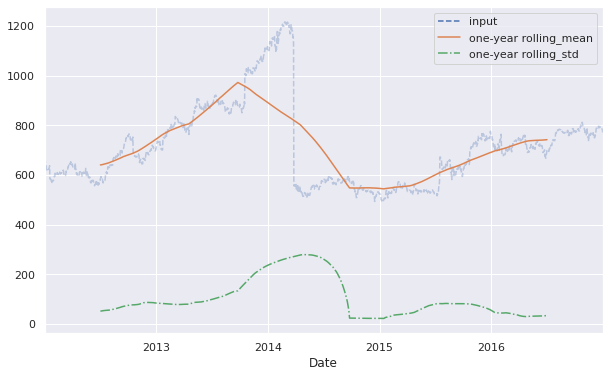

In [297]:
rolling = goog.rolling(365, center=True)
fig, ax = plt.subplots(figsize=(10,6))
df = pd.DataFrame({"input" : goog, 
                  "one-year rolling_mean" : rolling.mean(),
                  "one-year rolling_std" : rolling.std()})

df.plot(style=["--","-","-."], ax=ax)
ax.lines[0].set(alpha=0.3)


## Example: Visualizing Seattle Bicycle Counts

In [327]:
data = pd.read_csv("../../data/Fremont_Bridge_Bicycle_Counter.csv", parse_dates=True, index_col="Date", low_memory=False)
data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-11-30 19:00:00,35.0,17.0,18.0
2020-11-30 20:00:00,22.0,12.0,10.0
2020-11-30 21:00:00,11.0,6.0,5.0


In [329]:
data.rename(columns={"Fremont Bridge Total": "Total", "Fremont Bridge East Sidewalk" : "East", "Fremont Bridge West Sidewalk": "West"}, inplace=True)

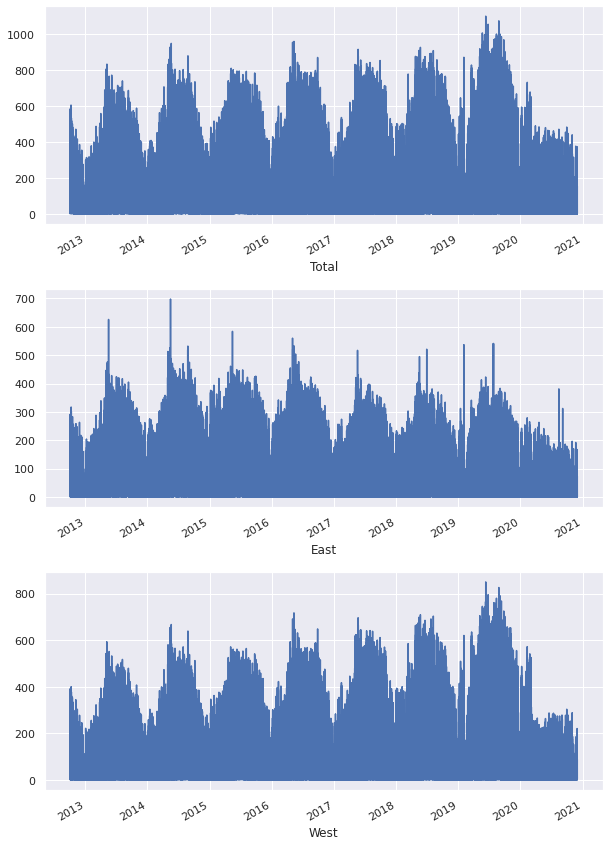

In [343]:
fig, ax = plt.subplots(3,1,figsize=(10,16))
fig.subplots_adjust(wspace=0.2,hspace=0.3)
i = 0 
for col, values in data.items() :
    data[col].plot(ax=ax[i])
    ax[i].set(xlabel=col)
    i+=1;
    

The ~137000 hourly samples are far too dense for us to make much sense of. We can
gain more insight by resampling the data to a coarser grid. Let’s resample sequently by **quarterly, monthly, weekly, daily**

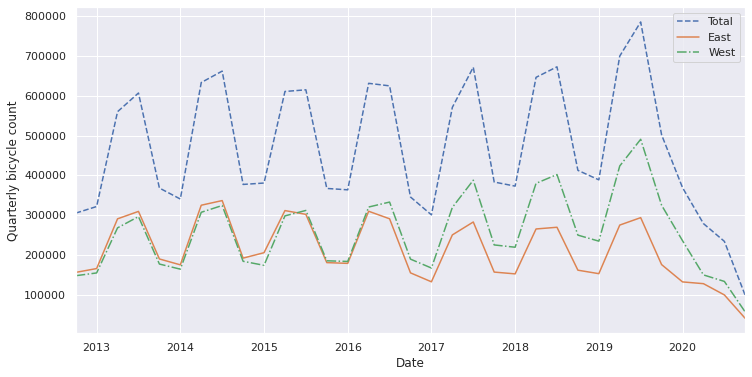

In [361]:
quarterly = data.resample("Q").sum()
quarterly.plot(figsize=(12,6), style=["--","-","-."])
plt.ylabel('Quarterly bicycle count');

<AxesSubplot:xlabel='Date'>

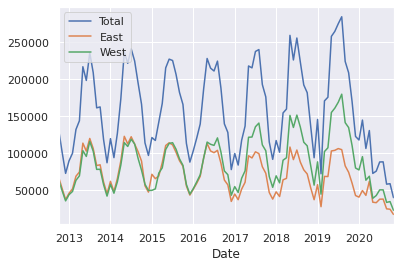

In [378]:
monthly = data.resample("M").sum()
monthly.plot()

<AxesSubplot:xlabel='Date'>

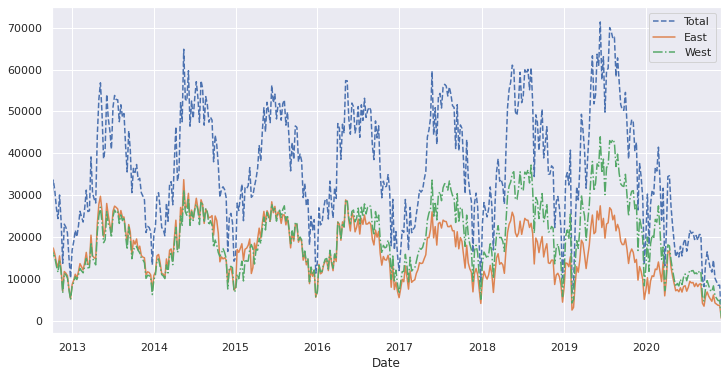

In [366]:
weekly_sum = data.resample("W").sum()
weekly_sum.plot(style=["--","-","-."], figsize=(12,6))

<AxesSubplot:xlabel='Date'>

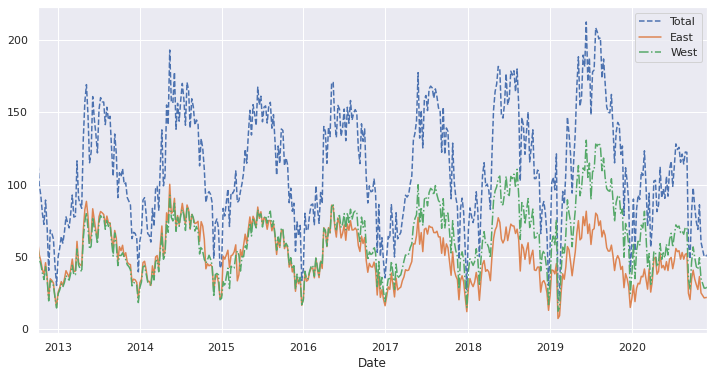

In [367]:
weekly_mean = data.resample("W").mean()
weekly_mean.plot(style=["--","-","-."], figsize=(12,6))

Another way that comes in handy for aggregating the data is to use a rolling mean,
utilizing the pd.rolling_mean() function. Here we’ll do a 30-day rolling mean of our
data, making sure to center the window (Figure 3-13):

Text(0, 0.5, 'Mean hourly count')

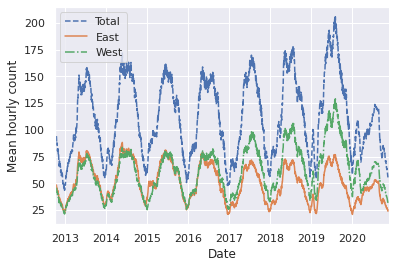

In [377]:
daily = data.resample("D").mean()
daily.rolling(30, center=True).mean().plot(style=["--","-","-."])
plt.ylabel("Mean hourly count")

### Digging into the data

<AxesSubplot:xlabel='time'>

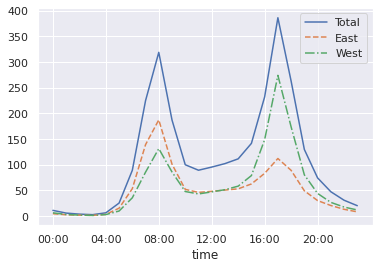

In [389]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=["-","--","-."])

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the
morning and 5:00 in the evening. This is likely evidence of a strong component of
commuter traffic crossing the bridge. This is further evidenced by the differences
between the western sidewalk (generally used going toward downtown Seattle),
which peaks more strongly in the morning, and the eastern sidewalk (generally used
going away from downtown Seattle), which peaks more strongly in the evening.

<AxesSubplot:>

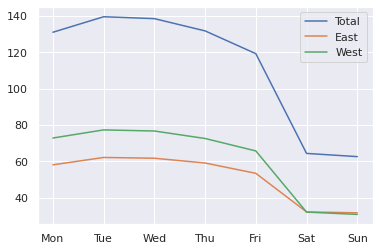

In [399]:
by_weekday = data.groupby(data.index.weekday).mean()
dayofweek = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
by_weekday.index = dayofweek
by_weekday.plot()

Text(0.5, 1.0, 'Weekend')

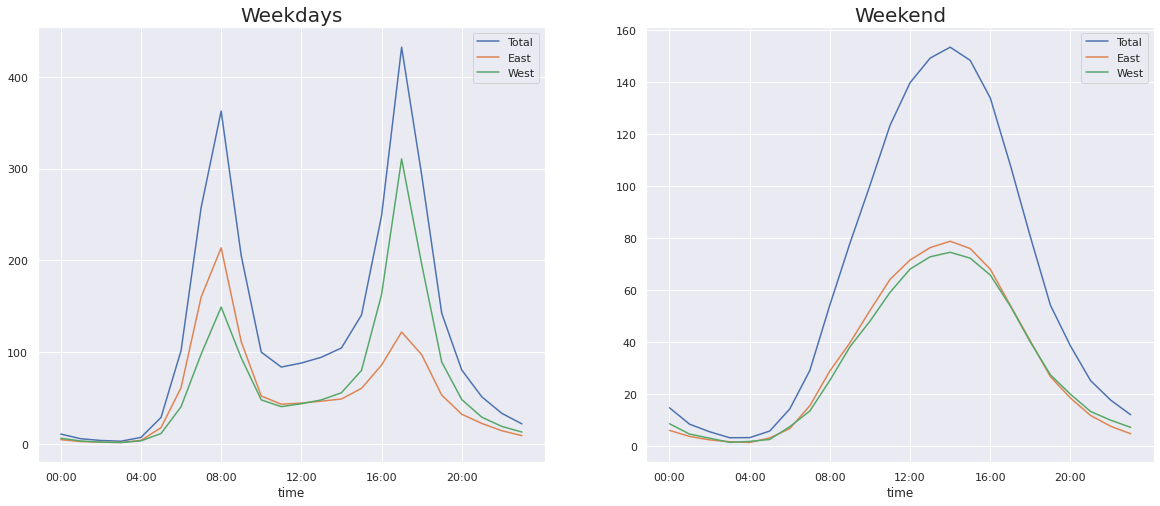

In [411]:
weekend = np.where(data.index.weekday > 5, "Weekend","Weekday")

by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1,2,figsize=(20,8))

by_time.loc["Weekday"].plot(ax=ax[0], xticks=hourly_ticks)
ax[0].set_title("Weekdays", fontsize=20)
by_time.loc["Weekend"].plot(ax=ax[1], xticks=hourly_ticks)
ax[1].set_title("Weekend", fontsize=20)